# Decoding a TFRecord file from the ImageNet dataset

In [1]:
import os
import glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.version.VERSION

'2.3.0'

In [3]:
list_of_files = glob.glob('/scratch/snx3000/stud50/imagenet/train*')
list_of_files[:6]

['/scratch/snx3000/stud50/imagenet/train-00608-of-01024',
 '/scratch/snx3000/stud50/imagenet/train-00497-of-01024',
 '/scratch/snx3000/stud50/imagenet/train-00372-of-01024',
 '/scratch/snx3000/stud50/imagenet/train-00104-of-01024',
 '/scratch/snx3000/stud50/imagenet/train-00456-of-01024',
 '/scratch/snx3000/stud50/imagenet/train-00363-of-01024']

In [4]:
sample = next(iter(tf.data.TFRecordDataset(list_of_files[0]).take(1)))
tf.train.Example.FromString(sample.numpy())

features {
  feature {
    key: "image/channels"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "image/class/label"
    value {
      int64_list {
        value: 512
      }
    }
  }
  feature {
    key: "image/class/synset"
    value {
      bytes_list {
        value: "n03100240"
      }
    }
  }
  feature {
    key: "image/class/text"
    value {
      bytes_list {
        value: "convertible"
      }
    }
  }
  feature {
    key: "image/colorspace"
    value {
      bytes_list {
        value: "RGB"
      }
    }
  }
  feature {
    key: "image/encoded"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\001\000d\000d\000\000\377\333\000C\000\006\004\005\006\005\004\006\006\005\006\007\007\006\010\n\020\n\n\t\t\n\024\016\017\014\020\027\024\030\030\027\024\026\026\032\035%\037\032\033#\034\026\026 , #&\')*)\031\037-0-(0%()(\377\333\000C\001\007\007\007\n\010\n\023\n\n\023(\032\026\032((((((((((((((((((((

In [5]:
def decode(serialized_example):
    """Decode and resize"""
    features = tf.io.parse_single_example(
        serialized_example,
        features={
            ## TODO specify feature mapping
        })
    ## TODO decode label and image (JPEG)
    ## TODO resize to fixed size
    return image, label

In [6]:
dataset = tf.data.TFRecordDataset(list_of_files)
dataset = dataset.map(decode)
dataset = dataset.batch(2)

(2, 224, 224, 3) [511 418]
(2, 224, 224, 3) [880 781]
(2, 224, 224, 3) [630  91]
(2, 224, 224, 3) [731 903]
(2, 224, 224, 3) [883 985]
(2, 224, 224, 3) [ 47 804]
(2, 224, 224, 3) [910 907]
(2, 224, 224, 3) [247  61]
(2, 224, 224, 3) [682  84]
(2, 224, 224, 3) [859 592]
(2, 224, 224, 3) [311 183]
(2, 224, 224, 3) [886 693]


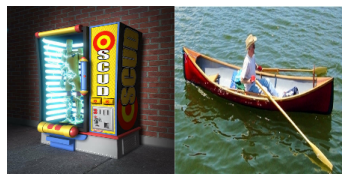

In [7]:
for images, labels in dataset.take(12):
    print(images.shape, labels.numpy())

concat = np.concatenate(list(images), 1)

plt.imshow(concat.astype(int))
plt.axis('off')
plt.show()

###